# Calendar Dataset Visulisation

In [1]:
import numpy as np
from scipy import sparse
import re
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as sk_split
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import datetime as dt
import math
%matplotlib inline
from sklearn.linear_model import Lasso as Lasso_Reg
from ipywidgets import interact,  FloatSlider, RadioButtons
import numpy as np 
import sklearn.preprocessing as Preprocessing
from sklearn.preprocessing import StandardScaler as Standardize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg

import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingRegressor

/Users/jaydip/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
calendar = pd.read_csv('calendar_detail.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00


In [4]:
calendar['price'] = calendar['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)

In [5]:
# Group by listing_id, then find each listing id's average price

grouped = calendar.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values

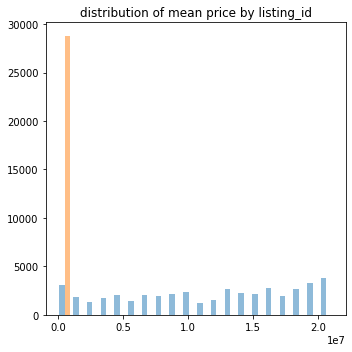

In [6]:
# Examine Distribution of average price by listing_id

fig, ax1 = plt.subplots(1, figsize=(5, 5))

ax1.hist(means, bins=20, alpha=0.5)
ax1.set_title('distribution of mean price by listing_id')


plt.tight_layout()
plt.show()

In [7]:
print("number of unique properties:", len(calendar['listing_id'].unique()))

number of unique properties: 44317


In [8]:
mean_df = grouped.mean()
mean_df['listing_id']

0            2515
1            2539
2            2595
3            3330
4            3647
           ...   
44312    21177156
44313    21177194
44314    21177575
44315    21177608
44316    21178032
Name: listing_id, Length: 44317, dtype: int64

In [9]:
calendar.reset_index(inplace=True)

In [10]:
# Initialize an empty column for the price differences 
calendar['price_diff'] = 0

In [11]:
# Subset dataframe of averages for left-merge
mean_df_new = mean_df[['listing_id','price']]

In [12]:
# Left-Merge
new = calendar.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')

In [13]:
# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']

In [14]:
# Convert dates to datetime
dates = pd.to_datetime(new['date'].values)

In [15]:
# Add new datetime object
new['datetime'] = dates

In [18]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()

In [19]:
print("Number of days average price difference was positive:", sum(final_sums['price_diff']>0))

Number of days average price difference was positive: 230


Text(0.5, 1.0, 'Days When List Price Exceeded Average List Price for Individual AirBnbs')

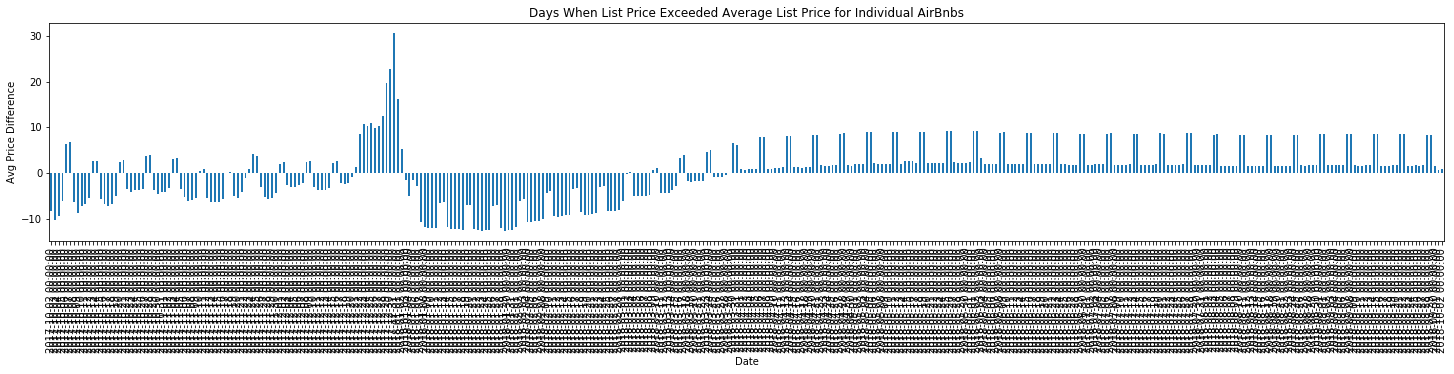

In [20]:
# Examine overall price difference trend

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
final_sums['price_diff'].plot(kind='bar', ax=ax)
ax.set_xticklabels(final_sums['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')

In [21]:
fall = final_sums[(final_sums['datetime'] > '2017-09-22') & (final_sums['datetime'] < '2017-12-22')] 
winter = final_sums[(final_sums['datetime'] > '2017-12-21') & (final_sums['datetime'] < '2018-03-20')] 
spring = final_sums[(final_sums['datetime'] > '2018-03-19') & (final_sums['datetime'] < '2018-06-21')] 
summer = final_sums[(final_sums['datetime'] > '2018-06-20') & (final_sums['datetime'] < '2018-09-23')]

Text(0.5, 1.0, 'Average Price Difference in Spring')

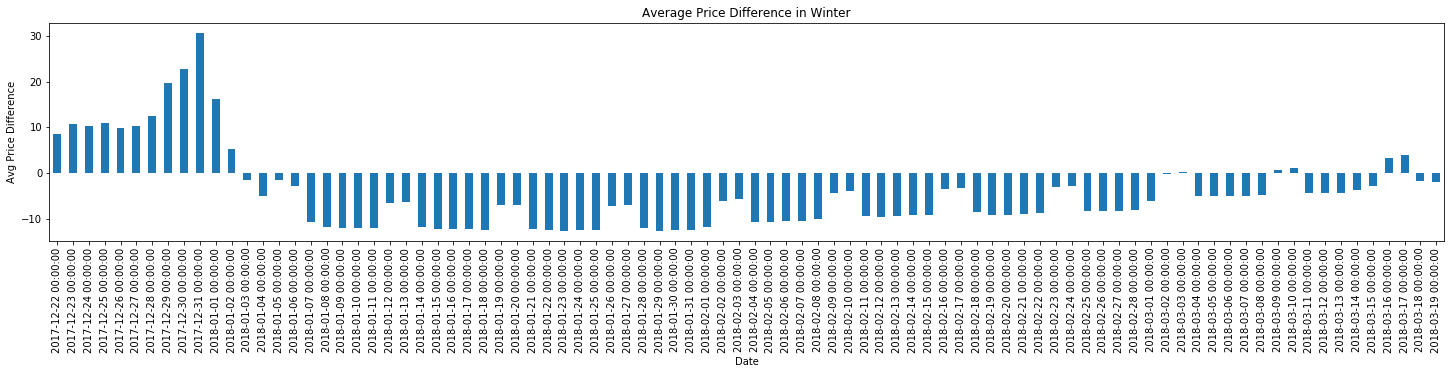

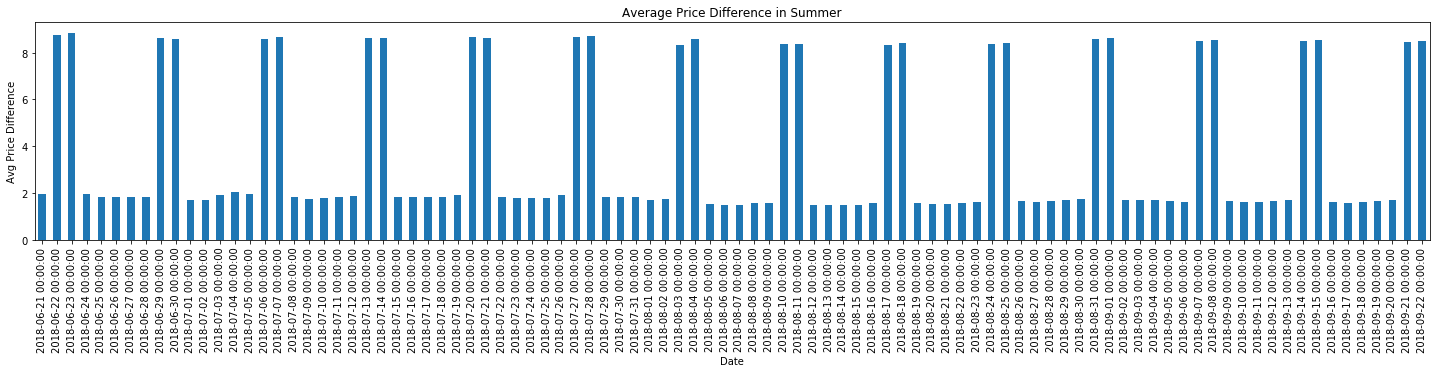

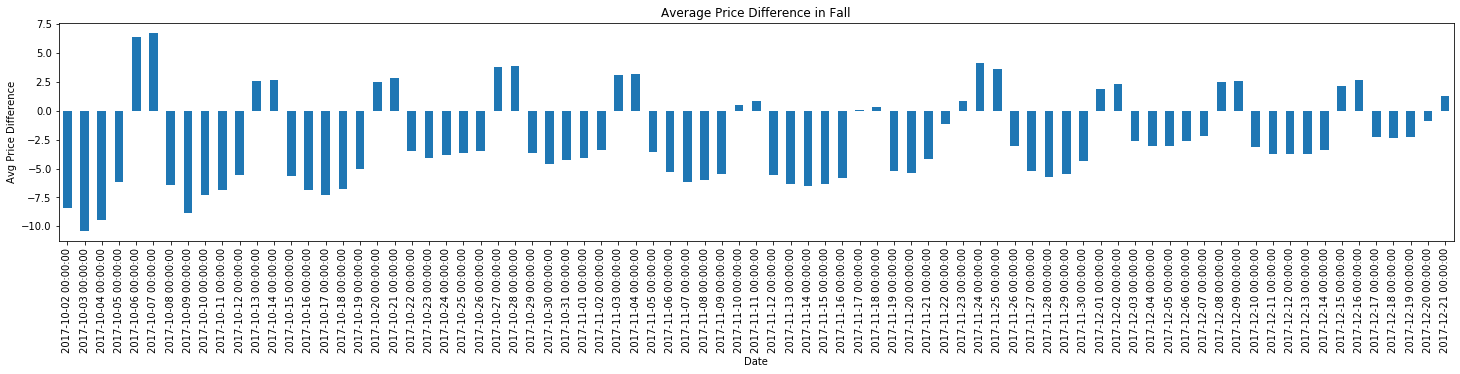

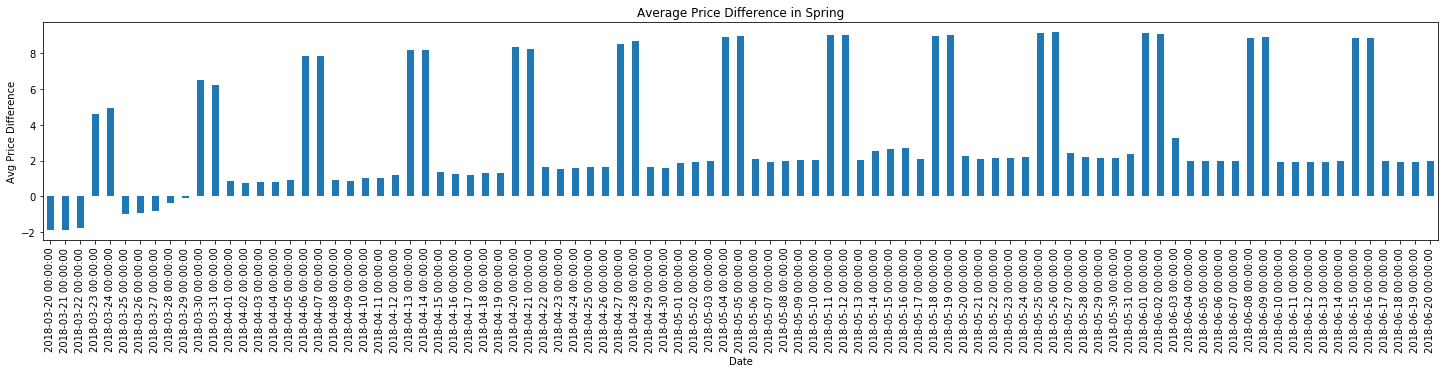

In [22]:
#winter
fig, ax = plt.subplots(1, 1, figsize=(25, 4))
winter['price_diff'].plot(kind='bar', ax=ax)
ax.set_xticklabels(winter['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Winter')

# SUMMER 

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
summer['price_diff'].plot(kind='bar', ax=ax)
ax.set_xticklabels(summer['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Summer')

#FALL

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
fall['price_diff'].plot(kind='bar', ax=ax)
ax.set_xticklabels(fall['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Fall')

#spring

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
spring['price_diff'].plot(kind='bar', ax=ax)
ax.set_xticklabels(spring['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Spring')

The average price difference for different dates for winter and summer are shown in the figures.
This can help us predict that there is fewer price difference during winter as there are less people visiting due to the weather conditions.

In [27]:
data = pd.read_csv('calendar_detail.csv')
#data['price']=data['price'].str.lstrip('$').astype(float)
data['date']=pd.to_datetime(data['date'])
#data['weekday'] = pd.Series(data.date).dt.dayofweek
data['price'] = data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)

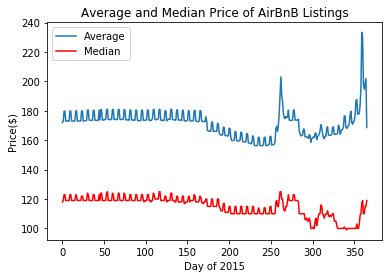

In [28]:
date=[]
avg_price=[]
median_price=[]
for i in data['date'].unique():
    date.append(i)
    avg_price.append(data[data['date'] == i]['price'].mean())
    median_price.append(data[data['date'] == i]['price'].median())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2015')
plt.title('Average and Median Price of AirBnB Listings')
plt.legend()

Here we see very interesting trends that occur. Overall, it seems like the trends are very cyclical in nature most clearly from a weekly perspective.

## Location Dataset Visulisation

In [29]:
data = pd.read_csv('listings_summary.csv')

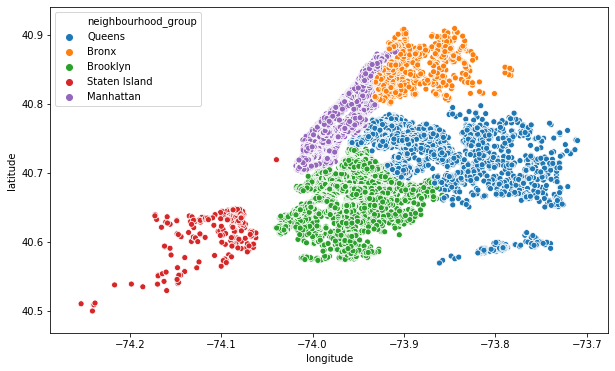

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

From this Graph we can see the same like actual representation of NYC location. We have make graph from logitude and latitude to see the location of the listing. From this we can visually see the where the most nomber of house listed in Airbnb.